In [3]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [4]:
#Since our dataset was alrady seperated into training and testing set
df_train= pd.read_csv("/content/train.csv")
df_test = pd.read_csv('/content/test.csv')

In [5]:
# concat into single dataset
df = pd.concat([df_train, df_test], ignore_index = True)
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


size of dataset

In [6]:
print('Number of rows in the dataset: {}'.format(len(df)))
print('Number of columns in the dataset: {}'.format(len(df.columns)))

Number of rows in the dataset: 1328
Number of columns in the dataset: 14


In [7]:
from pandas.core.arrays.base import missing
#Missing values in each column and their percentage
missing_values = []
missing_values_perc = []
for column in df.columns:
  missing_values = df[column].isna().sum()
  missing_values_perc = (missing_values/len(df)) * 100
df_missing_val=pd.DataFrame({
    'Missing_values' : missing_values,
    'Missing_values(%)' : missing_values_perc
} ,index=df.columns)

In [8]:
df_missing_val

,Missing_values,Missing_values(%)
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


In [9]:
#duplicate rows
df.loc[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
1324,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
1325,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
1326,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
#dropping duplicated rows
df = df.drop_duplicates()

In [11]:
print('shape of complete dataset{}'.format(df.shape))

shape of complete dataset(302, 14)


In [12]:
#columns
pd.DataFrame(df.columns)

,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
print('{}'.format(df.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None


Number of unique values in dataframe

In [15]:
def unique(dataset):
  unique_values_dic = {}
  columns = dataset.columns.to_list()
  for column in columns:
    unique_values =len(dataset[column].unique())
    unique_values_dic[column] = unique_values
  df_unique_values = pd.DataFrame([unique_values_dic],columns=columns).T
  df_unique_values.columns = ['Valuecounts']
  return df_unique_values

In [16]:
unique(df)

,Valuecounts
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [17]:
#sepearte in categorical or noncategorical dataset

#creating object to store dataset
df_unique = unique(df)

#creating new column whether it is categorical or not
df_unique['Categorical'] = df_unique['Valuecounts'] < 10
df_unique

,Valuecounts,Categorical
age,41,False
sex,2,True
cp,4,True
trestbps,49,False
chol,152,False
fbs,2,True
restecg,3,True
thalach,91,False
exang,2,True
oldpeak,40,False


Text(0.5, 1.0, 'Categorical vs. Non-Categorical Columns')

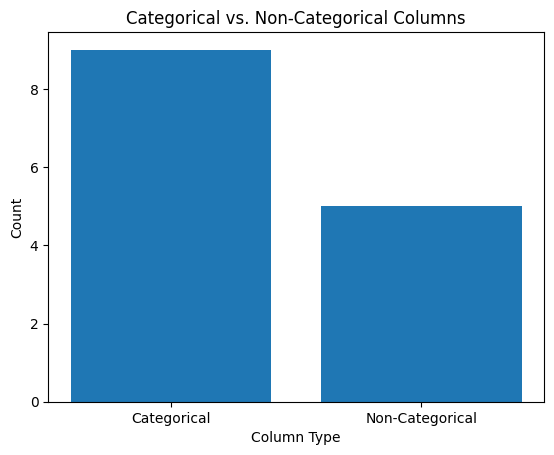

In [18]:
categorical_count = df_unique['Categorical'].sum()
non_categorical_count = len(df_unique) - categorical_count

# Create the bar plot
plt.bar(['Categorical', 'Non-Categorical'], [categorical_count, non_categorical_count])
plt.xlabel('Column Type')
plt.ylabel('Count')
plt.title('Categorical vs. Non-Categorical Columns')

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


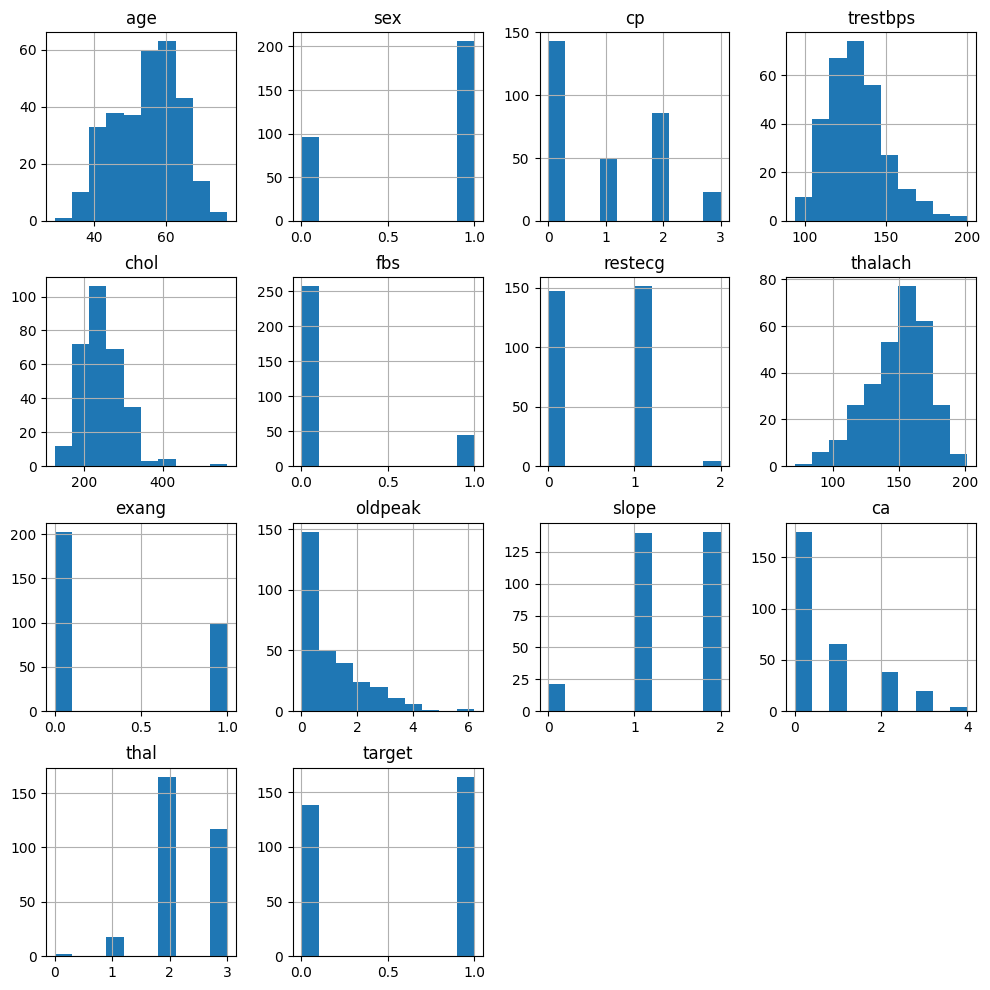

In [20]:
#plot histograms for each variable
df.hist(figsize = (12,12))
plt.show()


correlation matrix

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Correlation Heatmap

In [22]:
corr_mat = df.corr().stack().reset_index(name="correlation")
corr_mat.head(3)

,level_0,level_1,correlation
0,age,age,1.000000
1,age,sex,-0.094962
2,age,cp,-0.063107


Text(46.3916450617284, 0.5, 'Feature of Y')

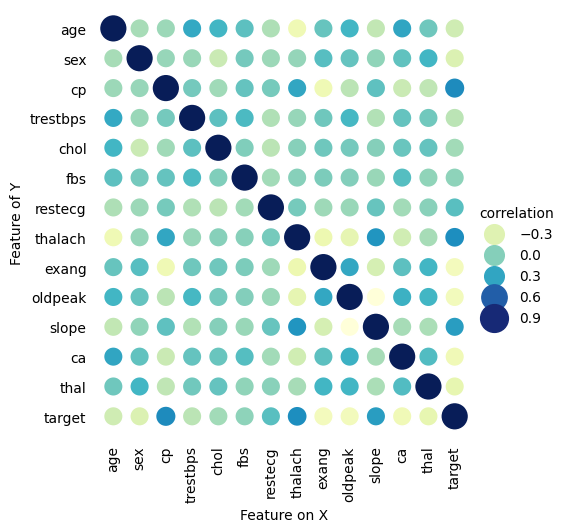

In [23]:

g = sns.relplot(
    data = corr_mat, x='level_0', y = 'level_1', hue='correlation'
    ,sizes = (200,400),palette='YlGnBu',size ='correlation',
    size_norm=(0.4,0.7)
)
#remove tick lines
plt.tick_params(left=False, bottom=False)
#remove the spines
g.despine(left=True, bottom=True)
plt.xticks(rotation = 90)
plt.xlabel('Feature on X')
plt.ylabel('Feature of Y')

From the above correlation Heatmap, The correlation between two columns *cp* and *thalach* is high with the *target* column

Text(0.5, 1.0, 'Hisstogram of Cholesterol')

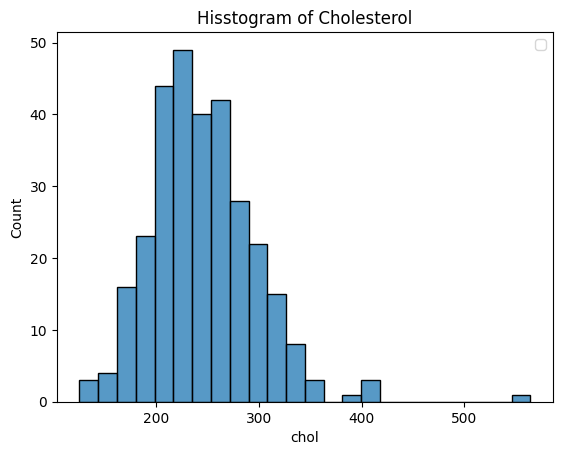

In [24]:
sns.histplot(data = df, x='chol')
plt.legend()
plt.title('Hisstogram of Cholesterol')

Text(0.5, 1.0, 'trestbps Vs \n Target ')

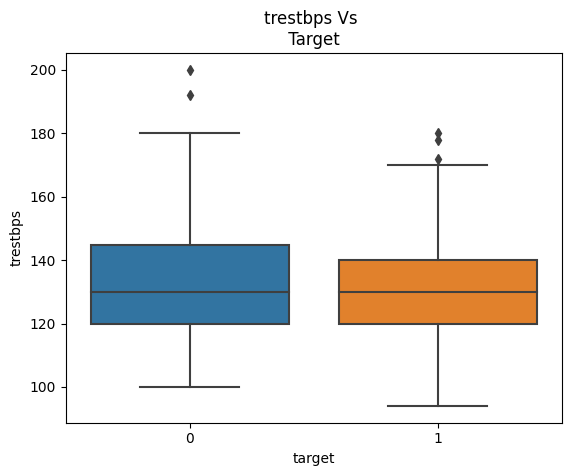

In [25]:
#scatter plot between trestbps and target
sns.boxplot(data =df, y = 'trestbps', x= 'target')
plt.title('trestbps Vs \n Target ')

Scatter plot of age and trestbps

Text(0, 0.5, 'trestbps(mm Hg)')

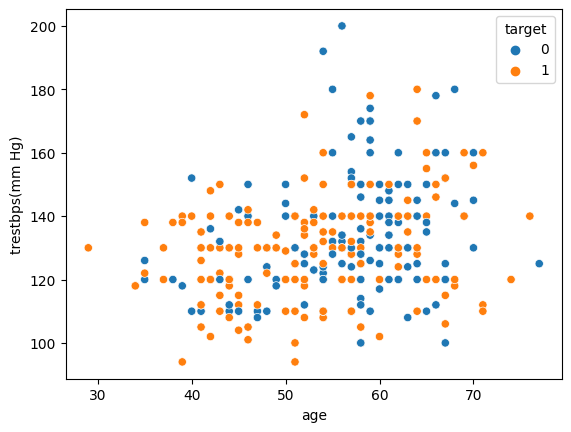

In [26]:
sns.scatterplot(data=df, x = 'age', y = 'trestbps', hue = 'target')
plt.ylabel('trestbps(mm Hg)')

([<matplotlib.axis.XTick at 0x7a9a5d717520>,
 [Text(0, 0, 'male '), Text(1, 0, 'female')])

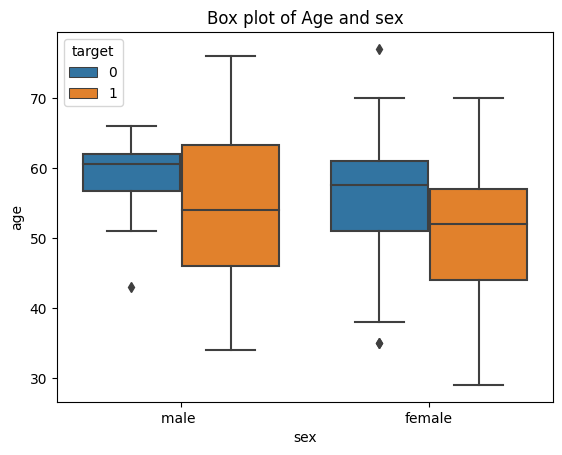

In [27]:
#Boxplot of resting blood pressure and Target
plt.title('Box plot of Age and sex')
sns.boxplot(data = df, x =
            'sex',y ='age', hue ='target')
plt.xticks(ticks = [0,1], labels = ['male ', 'female'])

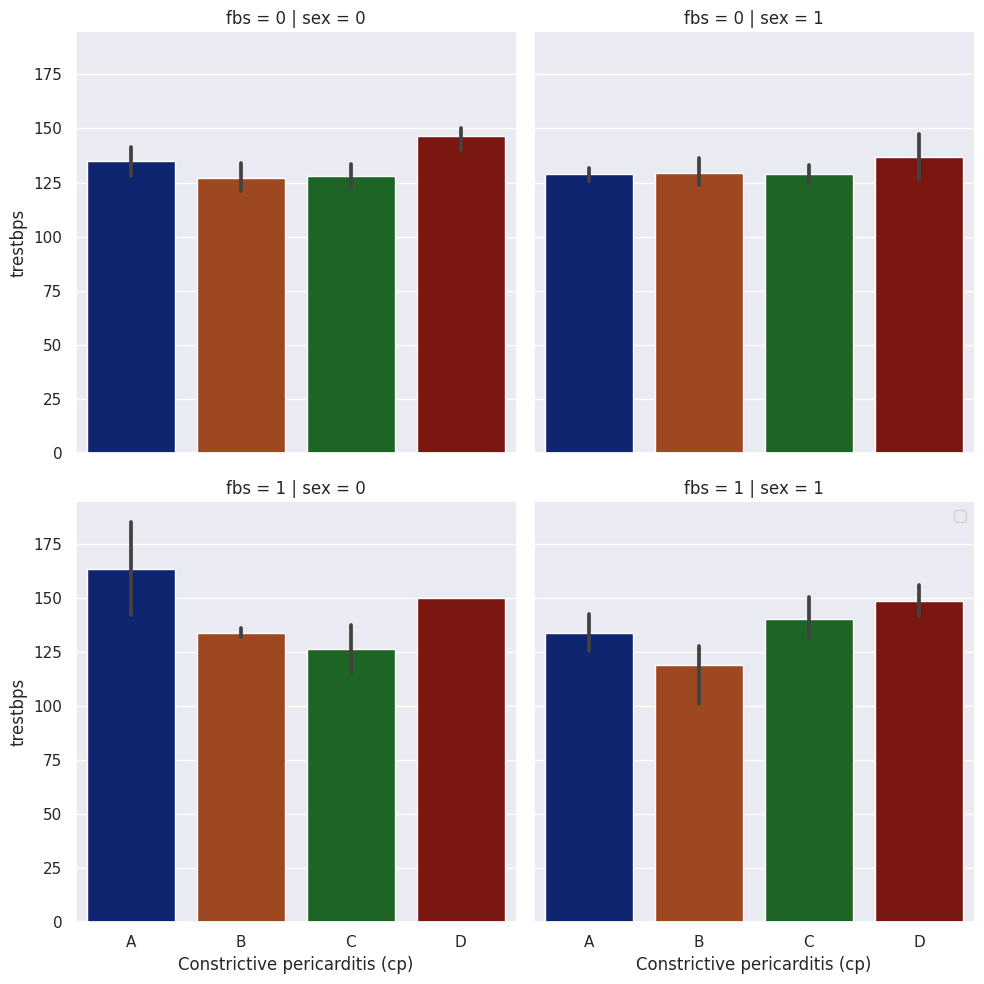

In [28]:
#catplot
#when one numerical column is showing good relation with the many categoriacl columns
sns.set_theme(style = 'darkgrid')
g= sns.catplot(
    data = df, x='cp', y = 'trestbps', col= 'sex', row = 'fbs', kind = 'bar',
   palette = 'dark'

)
g.set_xticklabels(['A', 'B', 'C', 'D'])
g.set_axis_labels('Constrictive pericarditis (cp)', 'trestbps')
plt.tight_layout()
plt.legend()

preparing machine learning model

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:13],df.loc[:,['target']],random_state = 42)

In [30]:
#shapes
print('Shape of X_train set{}'.format(X_train.shape))
print('Shape of X_test set{}'.format(X_test.shape))
print('Shape of y_train set{}'.format(y_train.shape))
print('Shape of y_test set{}'.format(y_test.shape))

Shape of X_train set(226, 13)
Shape of X_test set(76, 13)
Shape of y_train set(226, 1)
Shape of y_test set(76, 1)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
lr = LogisticRegression().fit(X_train,y_train)

Test score and evaluation of Logistic Regression model

In [32]:
#train score
#test score
print('Accuracy score on test data {}'.format(lr.score(X_test, y_test)))
print('Accuracy score on train data {}'.format(lr.score(X_train,y_train)))

Accuracy score on test data 0.8157894736842105
Accuracy score on train data 0.8761061946902655


In [33]:
print('Classification report \n {}'.format(classification_report(lr.predict(X_test),y_test)))

Classification report 
               precision    recall  f1-score   support

           0       0.72      0.91      0.81        32
           1       0.92      0.75      0.83        44

    accuracy                           0.82        76
   macro avg       0.82      0.83      0.82        76
weighted avg       0.84      0.82      0.82        76



Since the accuracy on test data is not much lower than the accuracy on training data..
Seems,
No issue of overfitting..

Still we will try to imporove the score and lessen the gap between training accuracy and testing accuracy

RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5, random_state = 2)
rfc.fit(X_train,y_train)
print('Accuracy score on training dataset {}'.format(rfc.score(X_train,y_train)))
print('Accuracy score on test dataset {}'.format(rfc.score(X_test,y_test)))
print('Classification report \n{}'.format(classification_report(rfc.predict(X_train),y_train)))

Accuracy score on training dataset 0.995575221238938
Accuracy score on test dataset 0.7368421052631579
Classification report 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        97
           1       1.00      0.99      1.00       129

    accuracy                           1.00       226
   macro avg       0.99      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



RandomforestClassifer seems to be overfitted

Let's try with Linear SVC model

In [35]:
from sklearn.svm import LinearSVC
svm = LinearSVC().fit(X_train,y_train)
print('Accuracy score on training dataset {}'.format(svm.score(X_train,y_train)))
print('Accuracy score on test dataset {}'.format(svm.score(X_test,y_test)))
print('Classification report \n{}'.format(classification_report(svm.predict(X_train),y_train)))

Accuracy score on training dataset 0.8230088495575221
Accuracy score on test dataset 0.7236842105263158
Classification report 
              precision    recall  f1-score   support

           0       0.65      0.91      0.76        70
           1       0.95      0.78      0.86       156

    accuracy                           0.82       226
   macro avg       0.80      0.85      0.81       226
weighted avg       0.86      0.82      0.83       226



Decision Tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier().fit(X_train,y_train)
print('Accuracy score on training dataset {}'.format(dtc.score(X_train,y_train)))
print('Accuracy score on test dataset {}'.format(dtc.score(X_test,y_test)))
print('Classification report \n{}'.format(classification_report(dtc.predict(X_train),y_train)))

Accuracy score on training dataset 1.0
Accuracy score on test dataset 0.7368421052631579
Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       128

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



From above all the applied algorithm,
LogisticRegression seems preferable.
note- **If dataset is too small, then does not matter what feature engineering algorithm you apply, Model will struggle to find the pattern..**

Thankyou